In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from inspect import signature as sig
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [52]:
X, y = make_blobs(n_samples = 100 ,n_features=2, centers = 4, random_state=8)
print(X)
print(y)
print(X.shape)
y = y%2

[[ -1.72161036  -1.48033142]
 [ -3.6573384   -9.5482383 ]
 [  7.0778163    0.99508772]
 [ -1.36579859  -0.3148625 ]
 [ -2.66521206  -3.12591651]
 [  7.63027116   8.69797933]
 [ -5.27144331 -12.11880698]
 [  7.91767139   1.41547387]
 [ -1.41284184   0.11296348]
 [ -1.01519039  -1.03318203]
 [  8.2634157   10.34723435]
 [  6.96767867   8.9622523 ]
 [ -0.84779249  -2.12185612]
 [  7.48006237   2.49392925]
 [  7.71454967   1.8420701 ]
 [ -7.74064658  -8.61800744]
 [ -5.41087235  -8.7194128 ]
 [ -2.27579204  -2.89699926]
 [ -1.25668449  -2.33416219]
 [  7.61227907   9.4463627 ]
 [  8.81545663   8.76386046]
 [  7.1895354    0.43090048]
 [  7.40292703   9.16217702]
 [  5.17209648  11.78064756]
 [ -2.10476115  -1.57846672]
 [  6.5342397    9.45532341]
 [  7.59635095   8.0197955 ]
 [ -0.6560501    0.68997013]
 [ -4.86090778 -10.77386053]
 [  8.90864428   0.97764968]
 [  8.09770696  -0.58369965]
 [ -0.79757091  -2.88641638]
 [  9.92897802   1.76719511]
 [ -1.36106796  -2.02701586]
 [  5.5987887 

Text(0, 0.5, 'feature 1')

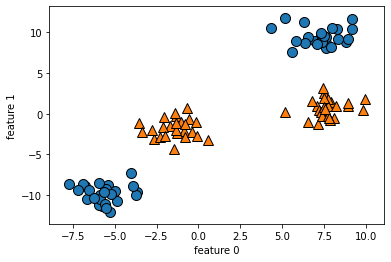

In [53]:
mglearn.discrete_scatter(X[:,0], X[:, 1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

# 커널 기법
그런 새로운 특성을 만들지 않고서도 고차원에서 분류기를 학습시킬 수 있는데 이를 "커널 기법"이라 한다.
실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리(스칼라 곱)를 계산한다.

Text(0, 0.5, 'feature 1')

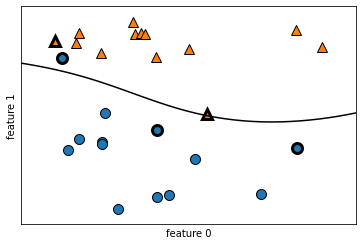

In [81]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=.1).fit(X,y)

mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1],y)

sv=svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=10, markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

In [69]:
print(sv_labels)
svm.support_vectors_

[False False False  True  True]


array([[ 8.1062269 ,  4.28695977],
       [ 9.50169345,  1.93824624],
       [11.563957  ,  1.3389402 ],
       [10.24028948,  2.45544401],
       [ 7.99815287,  4.8525051 ]])

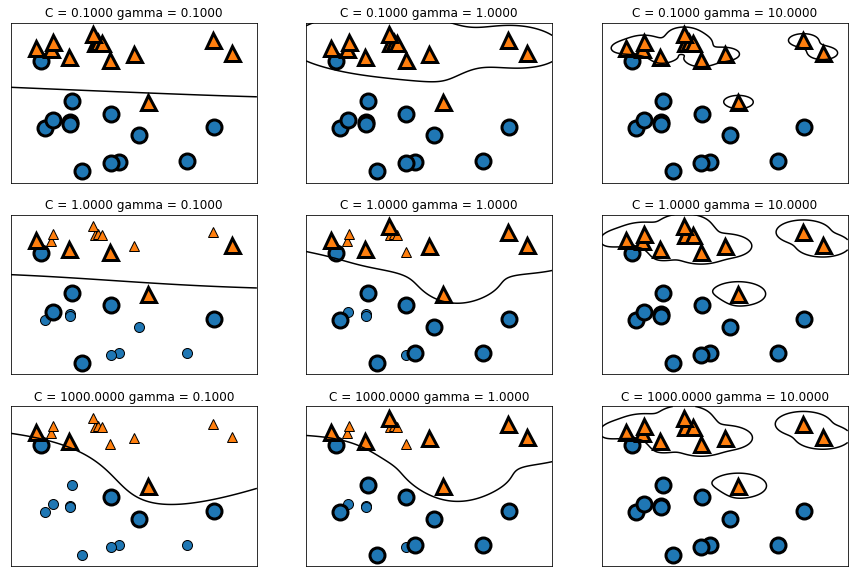

In [86]:
fig, axes = plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

# axes[0,0].legend(["class 0", "class 1", "class0 support vector", "class1 support vector"], ncol=4, loc=(.9,1.2))